# Analyzing Diva Vocal Tract Somatosensory System

In [1]:
%matplotlib inline
#Imports
from divapy import Diva
from divaml import Diva as Divaml
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from ipywidgets import HBox, VBox
import ipywidgets as widgets
from IPython import display

import warnings
warnings.filterwarnings('ignore')

In [2]:
m = []
for i in range(10):
    m += [widgets.FloatSlider(value=0.1, min=-3., max=3.,
                                 step=0.1,
                                 disabled=False,
                                 continuous_update=False,
                                 description = 'M'+str(i),
                                 orientation='vertical',
                                 readout=True,
                                 readout_format='f',
                                 slider_color='white'
                                 )]
    
for i in range(3):
    m += [widgets.FloatSlider(value=0.8, min=0., max=1.,
                                 step=0.1,
                                 disabled=False,
                                 continuous_update=False,
                                 description = 'M'+str(i+10),
                                 orientation='vertical',
                                 readout=True,
                                 readout_format='f',
                                 slider_color='white'
                                 )]
    
sound_chk = widgets.Checkbox(value=True, description="Play sound:")
sound_btn = widgets.Button(description="Repeat", disabled=True)

sys = Diva()
sysml = Divaml()

matplotlib.rcParams['figure.figsize'] = (16.0, 14.0)
matplotlib.rcParams.update({'font.size': 18})

In [3]:
def btn_repeat_sound_callback(foo):
#     sound_btn.disabled =True
    if sound_chk.value:
        sound_btn.disabled = False
        arts = np.array([x.get_interact_value() for x in m])       
        sound = sys.get_static_sound(arts)
        sys.play_sound(sound)    
    
def vt_plot(foo):    
    arts = np.array([x.get_interact_value() for x in m])
    
    aud,som,c,af = sys.get_audsom(arts)
    print(arts)
    audml,somml,cml,afml = sysml.get_audsom(arts)
    sound = sys.get_static_sound(arts)
    sound2 = sysml.get_static_sound(arts)
    
    
    display.clear_output(wait=True) #wait=True
    fig, ax = plt.subplots(2,3)
    ax[0,0] = sys.plot_outline(arts, axes=ax[0,0])
    ax[0,0].set_title("Outline")
    
    plt.sca(ax[0,1])
    plt.plot(aud,'ob')
    plt.hold(True)
    plt.plot(audml,'xr')
    ax[0,1].set_title("Audio Formants")

    plt.sca(ax[0,2])
    plt.plot(sound)
    plt.hold(True)
    ax[0,2].set_title("Sound")
    plt.plot(sound2)
    
    plt.sca(ax[1,1])
    plt.plot(som,'ob')
    plt.hold(True)
    plt.plot(somml,'xr')
    ax[1,1].set_ylim([-1,1])
    ax[1,1].invert_xaxis()
    ax[1,1].set_title("Somatosignals")

    plt.sca(ax[1,2])
    plt.plot(af,'b')
    plt.hold(True)
    plt.plot(afml,'r')
    ax[1,2].invert_xaxis()
    ax[1,2].set_title("Area Function")
 
    plt.show()
    sound_btn.disabled=True
    if sound_chk.value:
        sound_btn.disabled=False
        sys.play_sound(sound)

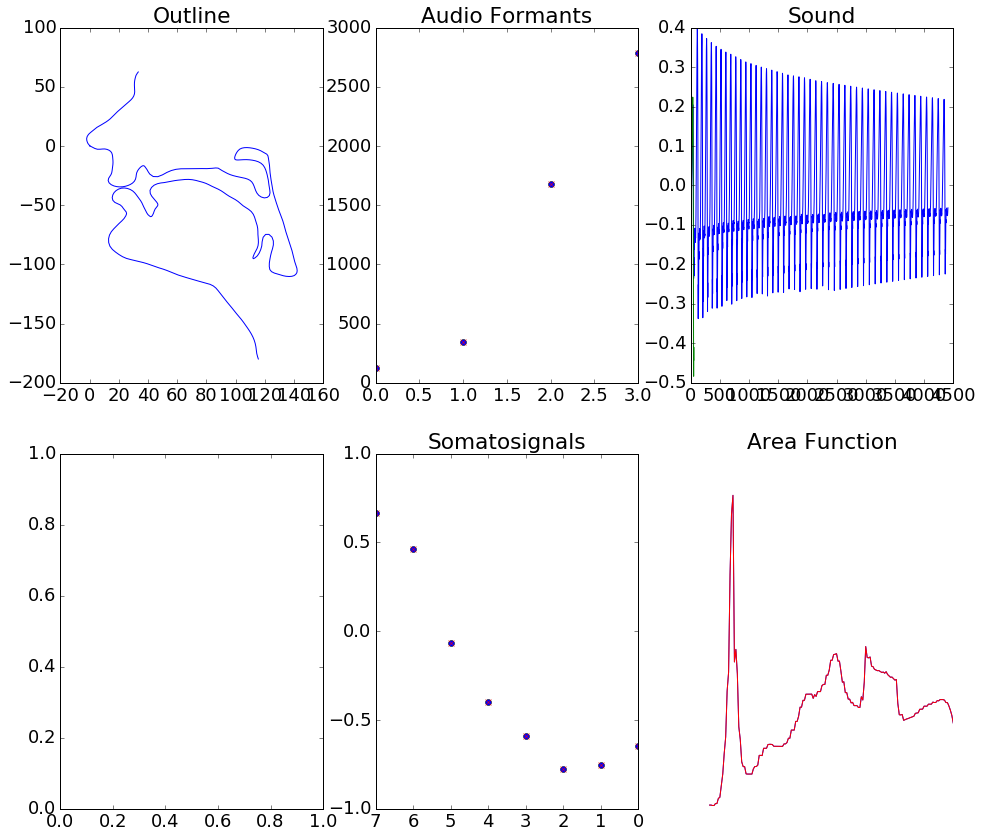

[ 0.4 -0.2  0.1  0.1  0.1 -0.2  0.1  0.1  0.1 -0.8  0.6  0.5  0.6]


In [4]:
for x in m: 
    x.observe(vt_plot,names='value')
sound_btn.on_click(btn_repeat_sound_callback)
display.display(VBox([HBox(m),HBox([sound_chk, sound_btn])]))
#M0 lips, #M1 Vertical tongue, #M2 Horizontal tongue #M3Tongue flatness